
<img src="https://img.kaikeba.com/web/hcTech/img_logo.png" alt="图片替换文本" width="500" height="150" align="bottom" />

# 目录
<font color=green size=4 face=雅黑>
- 图像读写 
- 图像基本属性:图像大小、数据类型、通道、颜色空间等 
- 图像 ROI
- 图像γ值转换
- 图像相似性变换 
- 图像仿射变换
- 图像投影变换   
- 图像一阶、二阶导数
- 图像卷积
- 图像导数、卷积的关系与应用: 边缘检测、模糊 


# 图像读取
```python
cv2.imread()
```

[Jupyter Notebook 添加目录插件](https://www.jianshu.com/p/7687c6bec65e)

# 图像基本属性: 图像大小、数据类型、通道

In [1]:
# your code
import cv2
from functools import reduce
img = cv2.imread("Palace.jpg",1) 

print('type of image: ', type(img))
print('dtype of image: ', img.dtype)
print('dim of image :', img.ndim)
print('shape of image :', img.shape)
print('size of image :', img.size)

print('{} = {}'.format('*'.join(map(str, img.shape)), reduce(lambda x, y: x * y, img.shape)))


type of image:  <class 'numpy.ndarray'>
dtype of image:  uint8
dim of image : 3
shape of image : (331, 500, 3)
size of image : 496500
331*500*3 = 496500


In [ ]:
cv2.imread?

In [2]:
print(img[:,:,0])
print("shape of img[:,:,0] : ", img[:,:,0].shape)

[[185 184 182 ... 120 117 114]
 [183 183 182 ... 117 114 111]
 [178 178 179 ... 118 114 111]
 ...
 [158 159 158 ... 189 189 189]
 [ 35  35  38 ... 189 189 189]
 [105 106 111 ... 189 189 189]]
shape of img[:,:,0] :  (331, 500)


In [3]:
print(img[:,:,1])
print("shape of img[:,:,1] : ", img[:,:,1].shape)

[[146 145 143 ...  68  66  63]
 [144 144 143 ...  65  62  60]
 [141 141 143 ...  65  61  59]
 ...
 [151 153 151 ... 153 153 153]
 [ 34  36  37 ... 153 153 153]
 [114 117 121 ... 153 153 153]]
shape of img[:,:,1] :  (331, 500)


In [4]:
print(img[:,:,2])
print("shape of img[:,:,2] : ", img[:,:,2].shape)

[[118 117 115 ...  15  10   7]
 [116 116 115 ...  12   9   4]
 [113 113 113 ...  14  10   6]
 ...
 [194 194 194 ... 123 123 123]
 [ 84  86  87 ... 123 123 123]
 [141 144 145 ... 123 123 123]]
shape of img[:,:,2] :  (331, 500)


In [5]:
print('max value in img : ', img.min())
print('min value in imge : ', img.max())

max value in img :  0
min value in imge :  255


# 图像基本属性: 颜色空间

In [6]:
import numpy as np

sample_image = img.shape

all_0_array = np.zeros(sample_image, dtype = np.uint8)

In [7]:
all_255_array = np.full(sample_image ,img.max(), dtype = np.uint8)

In [8]:
some_test_value = 180 # random.randint(0, 255) # Why 255? 

all_180_array = np.full(sample_image, some_test_value, dtype = np.uint8)

In [9]:
%matplotlib inline

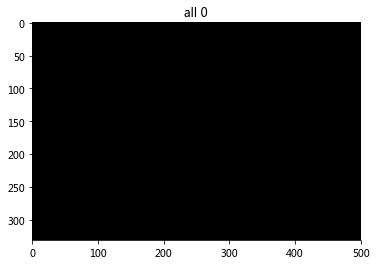

In [10]:
from matplotlib import pyplot as plt 
 
plt.title("all 0") 
#plt.xlabel("x axis caption") 
#plt.ylabel("y axis caption") 
plt.imshow(all_0_array) 
plt.show()

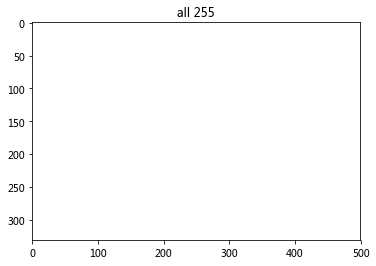

In [11]:
from matplotlib import pyplot as plt 
 
plt.title("all 255") 
#plt.xlabel("x axis caption") 
#plt.ylabel("y axis caption") 
plt.imshow(all_255_array) 
plt.show()

126


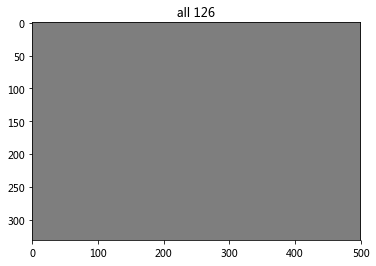

In [12]:
from matplotlib import pyplot as plt 
import random
 
some_test_value = random.randint(0, 255) 
print(some_test_value)
plt.title("all {}".format(str(some_test_value))) 
all_array = np.full(sample_image, some_test_value, dtype = np.uint8)
plt.imshow(all_array) 
plt.show()

In [13]:
#from matplotlib import pyplot as plt 

def img_show(x,title_caption):
    '''
    x is np array
    title_caption is str
    '''
    plt.title(title_caption) 
    #plt.xlabel("x axis caption") 
    #plt.ylabel("y axis caption") 
    plt.imshow(x) 
    plt.show()

In [14]:
new_size = (400, 400, 3)

MAX_VALUE = 2**8 - 1

img_array = np.full(new_size,0,dtype = np.uint8)
img_array[:,:,0] = np.full(new_size[:2], MAX_VALUE)

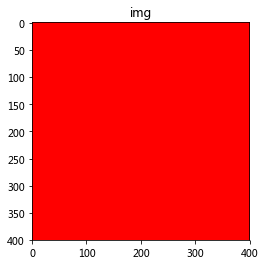

In [15]:
img_show(img_array,'img')

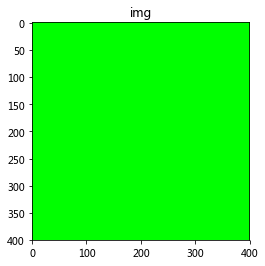

In [16]:
TWO_DIMENSION = 2

img_array = np.full(new_size, 0, dtype = np.uint8)
img_array[:,:,1] = np.full(new_size[:TWO_DIMENSION], MAX_VALUE)
img_show(img_array,'img')

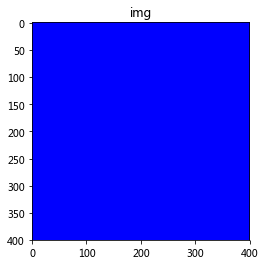

In [17]:
img_array = np.full(new_size,0,dtype = np.uint8)
img_array[:,:,2] = np.full(new_size[:TWO_DIMENSION],MAX_VALUE)
img_show(img_array,'img')

![](彩色空间.gif)



 <center>
<img style="zoom:100%;"
src="img_rgb.png">
<br>
<div style="color:black; "> 彩色图片</div>
</center>

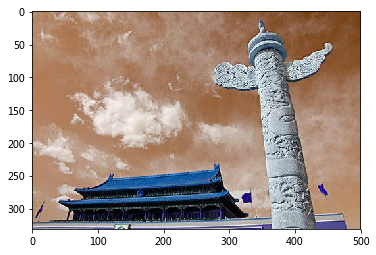

In [18]:
plt.imshow(img)
plt.show()

In [ ]:
# your code


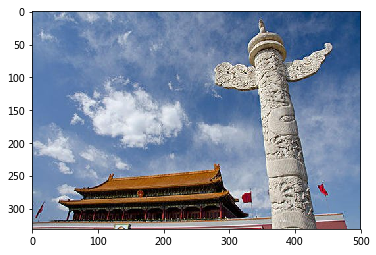

In [19]:

img_b = img[:,:,0]
img_g = img[:,:,1]
img_r = img[:,:,2]

img_rgb = np.full((img.shape),0,dtype = np.uint8)
img_rgb[:,:,0] = img_r
img_rgb[:,:,1] = img_g
img_rgb[:,:,2] = img_b

plt.imshow(img_rgb)
plt.show()

#img_rgb = img[:,:,(2,1,0)]
#img_show(img_rgb,'img_rgb')

另外，可以用cv2.cvtColor转换图像的通道

In [ ]:
cv2.imread?

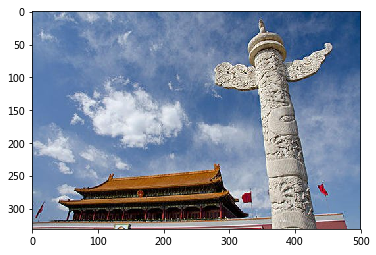

In [20]:
from matplotlib import pyplot as plt
img_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr)
plt.show()

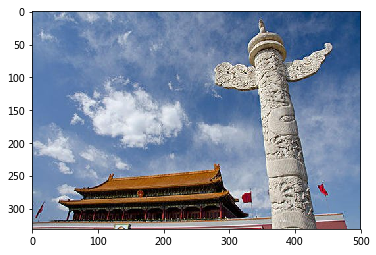

In [21]:
# 显示单通道的图像
b, g, r = cv2.split(img)
merge_img = cv2.merge([r,g,b])

plt.imshow(merge_img)
plt.show()

In [ ]:
# img = cv2.imread("图片的地址"，flag)
# 像素点

In [22]:
plt.imshow?

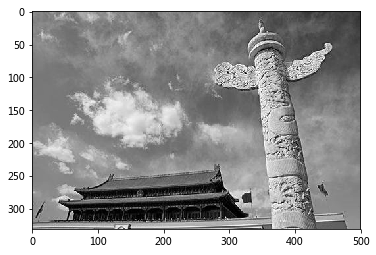

In [23]:
img = cv2.imread("故宫.jpg", 0)
plt.imshow(img, cmap='gray')
plt.show()

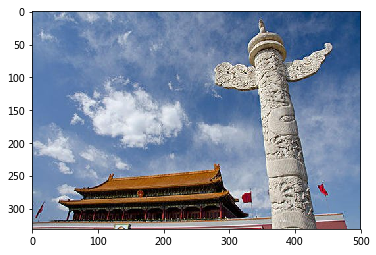

In [24]:
img = cv2.imread("故宫.jpg",1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# HSI


 <center>
<img style="zoom:100%;"
src="hsi.gif">
<br>
<div style="color:black; "> HSI </div>
</center>

HSI模型 基于人类对颜色的感觉，HSI模型描述颜色的三个基本特征：   

- 色相（Hue, H）是从物体反射或透过物体传播的颜色。在 0 到 360 度的标准色轮上，色相是按位置度量的。在通常的使用中，色相是由颜色名称标识的，比如红、橙或绿色。    

- 饱和度（Saturation, S），有时也称彩度，是指颜色的强度或纯度。饱和度表示色相中灰成分所占的比例，用从 0%（灰色）到 100%（完全饱和）的百分比来度量。在标准色轮上，从中心向边缘饱和度是递增的。 

- 亮度（Intensity, I）是颜色的相对明暗程度，通常用从 0%（黑）到 100%（白）的百分比来度量。   

 - RGB 转换为 HSI
 <center>
<img style="zoom:70%;"
src="hsi公式1.jpeg">
<br>
<div style="color:black; "> RGB到HSI </div>
</center>

# HSV 

- Hue（色调、色相）
- Saturation（饱和度、色彩纯净度）
- Value（明度）


- HSV与HSI的区别 
>hsv里面的v指的是RGB里面的最大的值，v = max(r,g,b)；    
而HSI的I是平均值，I=(r+g+b) / 3;     
另外两个分量应该是一样的。  

> H:  0— 180

> S:  0— 255

> V:  0— 255


 <center>
<img style="zoom:90%;"
src="hsv1.png">
<br>
<div style="color:black; "> HSV </div>
</center>

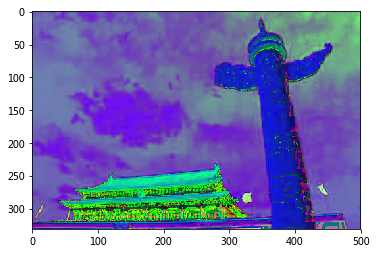

In [25]:

from matplotlib import pyplot as plt 

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
plt.imshow(img_hsv ,cmap='hsv')
plt.show()

# [ OpenCV 文档](https://docs.opencv.org)

In [26]:
import cv2
cv2.__version__

'3.4.2'

In [ ]:
cv2.xfeatures2d?

# 图像 ROI

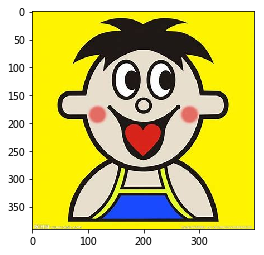

In [27]:
import cv2
person_bgr = cv2.imread('person.jpeg') 
person = cv2.cvtColor(person_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(person)
plt.show()

In [28]:
person_bgr.shape

(390, 398, 3)

In [29]:
 HEIGHT,WIDTH, CHANNEL = person_bgr.shape

You have removed 19 pixel(s)


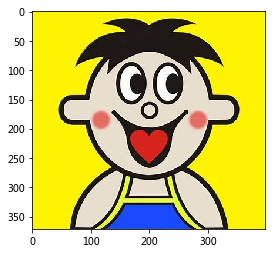

(371, 398, 3)


In [30]:
import cv2
person_bgr = cv2.imread('person.jpeg') 
# person_bgr = person_bgr[0:HEIGHT,:,:]
random_substract = random.randint(0, HEIGHT)
person_bgr = person_bgr[0:HEIGHT - random_substract,:,:]
print('You have removed {} pixel(s)'.format(random_substract))
person = cv2.cvtColor(person_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(person)
plt.show()

print(person.shape)



 <center>
<img style="zoom:100%;"
src="color_hsv.jpg">
<br>
<div style="color:black; "> 颜色的阈值表 </div>
</center>

`cv2.inRange(img_hsv, (h_min, s_min, v_min), (h_max, s_max, v_max))`函数
`cv2.inRange`函数通过设置不同的`h、s、v`的`min`和`max`阈值可以获取不同色彩的一个二值的`mask`图

In [31]:
YELLOW_HMIX, YELLOW_SMIN, YELLOW_VMIN = 26, 43, 46
YELLOW_HMAX = 34

person_bgr = cv2.imread('person.jpeg') 


person_hsv = cv2.cvtColor(person_bgr, cv2.COLOR_BGR2HSV)       # 转换成hsv色彩风格
mask = cv2.inRange(
                    person_hsv, 
                    (YELLOW_HMIX, YELLOW_SMIN, YELLOW_VMIN), 
                    (YELLOW_HMAX, MAX_VALUE, MAX_VALUE)
                  )   # 利用inRange产生mask
print(mask.shape)

(390, 398)


In [32]:
print(mask)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


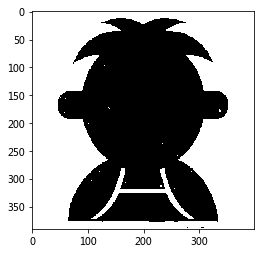

In [37]:
plt.imshow(mask, cmap='gray')
plt.show()

cv2.bitwise_not(img)

按位取反操作函数，将img在R,G,B三个分量分别进行按位取反操作。

In [39]:
mask1 = cv2.bitwise_not(mask)

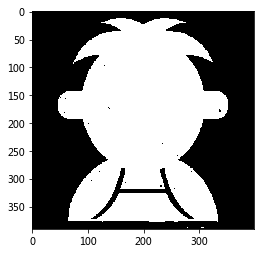

In [40]:
plt.imshow(mask1, cmap='gray')
plt.show()

In [41]:
print(mask1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


cv2.bitwise_and(img1, img2, mask)

按位与操作函数，将img1和img2在mask的区域内，R,G,B三个分量分别进行按位与操作。


cv2.bitwise_or(img1, img2, mask)  

按位或操作函数，将img1和img2在mask的区域内，R,G,B三个分量分别进行按位或操作。

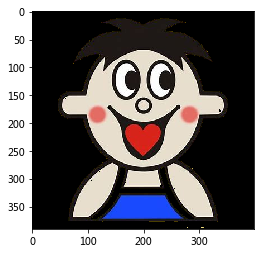

In [42]:
person = cv2.cvtColor(person_bgr, cv2.COLOR_BGR2RGB)
person_and_mask1 = cv2.bitwise_and(person, person, mask=mask1)

plt.imshow(person_and_mask1)
plt.show()

In [43]:
print(img.shape)

(331, 500, 3)


In [44]:
array = np.uint8(np.full((sample_image[0],sample_image[1]-WIDTH),MAX_VALUE))
print(array.shape)

(331, 102)


In [45]:
mask2 = mask[0:sample_image[0],:]

print(mask2.shape)
new_mask = np.hstack((mask2, array))
print(new_mask.shape)



(331, 398)
(331, 500)


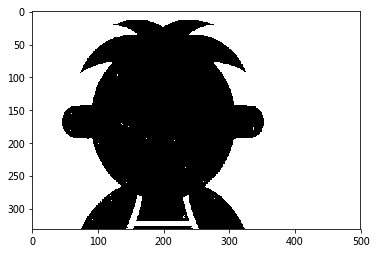

In [47]:
plt.imshow(new_mask, cmap='gray')
plt.show()

In [48]:
print(new_mask)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


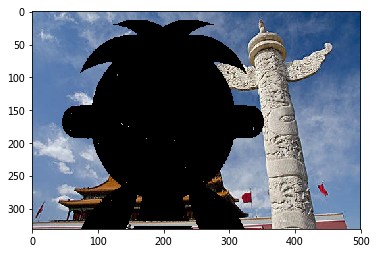

In [49]:
img_and_new_mask = cv2.bitwise_and(img_rgb, img_rgb, mask=new_mask)
plt.imshow(img_and_new_mask)
plt.show()

In [50]:
THREE_DIMENTION = 3
array1 = np.uint8(np.full((sample_image[0],abs(WIDTH - sample_image[1]),THREE_DIMENTION),0))

print(array1.shape)
print(person_and_mask1.shape)
person_and_mask2 = np.hstack((person_and_mask1[0:sample_image[0],:,:], array1))
print(person_and_mask2.shape)

(331, 102, 3)
(390, 398, 3)
(331, 500, 3)


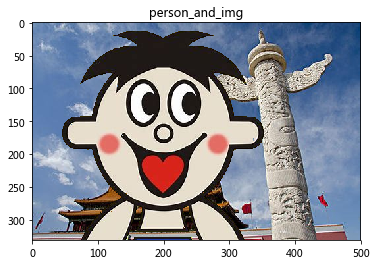

In [51]:
person_and_img = person_and_mask2 + img_and_new_mask
img_show(person_and_img,'person_and_img')

In [52]:
# 扩展 + 
img_rgb[:,:,0]

array([[118, 117, 115, ...,  15,  10,   7],
       [116, 116, 115, ...,  12,   9,   4],
       [113, 113, 113, ...,  14,  10,   6],
       ...,
       [194, 194, 194, ..., 123, 123, 123],
       [ 84,  86,  87, ..., 123, 123, 123],
       [141, 144, 145, ..., 123, 123, 123]], dtype=uint8)

In [53]:
img_rgb[:,:,1]

array([[146, 145, 143, ...,  68,  66,  63],
       [144, 144, 143, ...,  65,  62,  60],
       [141, 141, 143, ...,  65,  61,  59],
       ...,
       [151, 153, 151, ..., 153, 153, 153],
       [ 34,  36,  37, ..., 153, 153, 153],
       [114, 117, 121, ..., 153, 153, 153]], dtype=uint8)

In [54]:
img_add = img_rgb[:,:,0] + img_rgb[:,:,1]
img_add

array([[  8,   6,   2, ...,  83,  76,  70],
       [  4,   4,   2, ...,  77,  71,  64],
       [254, 254,   0, ...,  79,  71,  65],
       ...,
       [ 89,  91,  89, ...,  20,  20,  20],
       [118, 122, 124, ...,  20,  20,  20],
       [255,   5,  10, ...,  20,  20,  20]], dtype=uint8)

118+146 = 264 
264 \mod 256 = 8

<center>
<img style="zoom:50%;"
src="add_mod.jpeg ">
<br>
    <div style="color:black; "> </div>
</center>

In [55]:
# cv2.add()
I_cv_add = cv2.add(img_rgb[:,:,0], img_rgb[:,:,1])
I_cv_add 

array([[255, 255, 255, ...,  83,  76,  70],
       [255, 255, 255, ...,  77,  71,  64],
       [254, 254, 255, ...,  79,  71,  65],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [118, 122, 124, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)


<center>
<img style="zoom:50%;"
src="cv_add.jpeg ">
<br>
    <div style="color:black; "> </div>
</center>

```python
  dst=cv2.addWeighted(src1, alpha, src2, beta, gamma)
 ```

random alpha:0.6507967451733845, random beta:0.8018083118389774, random gamma:9


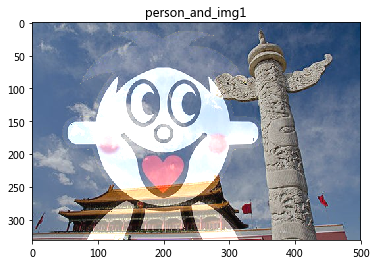

In [56]:
random_alpha = random.random() 
random_beta = random.random()
random_gamma = random.randint(0, 10) 
print("random alpha:{}, random beta:{}, random gamma:{}".format(random_alpha, random_beta, random_gamma))
person_and_img1 = cv2.addWeighted(person_and_mask2, random_alpha, img_rgb, random_beta, random_gamma)
img_show(person_and_img1, 'person_and_img1')

# 相似变换

<center>
<img style="zoom:40%;"
src="x0_y0.png ">
<br>
    <div style="color:black; "> </div>
</center>

$$
x_0 = R \cdot \cos b     \tag{1}
$$

$$
y_0 = R \cdot \sin b    \tag{2}
$$

$$
x_1 =  R\cos (a+b)  = R(\cos b \cos a - \sin b \sin a) =x_0 \cos a -y_0 \sin a    \tag{3}
$$

$$
y_1 =  R \sin (a+b) = R (\cos b \sin a + \sin b \cos a) =x_0 \sin a + y_0 \cos a     \tag{4}
$$

**旋转**

$$
\begin{bmatrix} x_1 \\ y_1 \end{bmatrix} =  \begin{bmatrix} \cos a & -\sin a \\ \sin a & \cos a  \end{bmatrix} \begin{bmatrix} x_0 \\ y_0 \end{bmatrix} \tag{5}
$$

**平移**

$$
\begin{bmatrix} x_1 \\ y_1 \end{bmatrix}  = [R|t]x_0 =  \begin{bmatrix} \cos a & -\sin a & t_x \\ \sin a & \cos a  & t_y \end{bmatrix} \begin{bmatrix} x_0 \\ y_0  \\ 1 \end{bmatrix} \tag{6}
$$

**缩放**

$$
\begin{bmatrix} x_1 \\ y_1 \end{bmatrix}  = s[R|t]x_0 =  s\begin{bmatrix} \cos a & -\sin a & t_x \\ \sin a & \cos a  & t_y \end{bmatrix} \begin{bmatrix} x_0 \\ y_0  \\ 1 \end{bmatrix} \tag{6}
$$



**旋转 (rotation) + 平移 (translation) + 缩放 (scale) = 相似变换 (similarity transform)**

In [57]:
# 相似变换 
import cv2
def rotate(img_ori, aug_value, scale):
    '''
    img_ori: 图像
    aug_value:旋转角度
    scale:缩放值
    M :旋转矩阵
    '''
    M = cv2.getRotationMatrix2D((0.5*img_ori.shape[1], 0.5*img_ori.shape[0]), aug_value, scale)
    new_img = cv2.warpAffine(img_ori, M, (img_ori.shape[1], img_ori.shape[0]))
    return new_img


random_aug:161.4450120155509, random_scale:0.8917461914933341


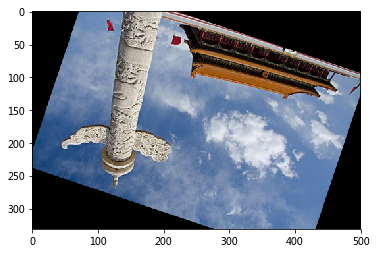

In [58]:
img_bgr = cv2.imread("Palace.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
random_aug = random.uniform(0,360)
random_scale = random.random()
print("random_aug:{}, random_scale:{}".format(random_aug, random_scale))
new_img = rotate(img_rgb, random_aug, random_scale)

from matplotlib import pyplot as plt 
plt.imshow(new_img)
plt.show()


# 仿射变换

**平移 (Translation) + 缩放 (Scale) + 翻转 (Flip) + 旋转 (Rotation) + 斜切 (Shear) = 仿射变换 (Affine Transform)**

<center>
<img style="zoom:50%;"
src="仿射变换.png ">
<br>
    <div style="color:black; "> </div>
</center>

斜切
<center>
<img style="zoom:80%;"
src="斜切.jpg ">
<br>
    <div style="color:black; "> </div>
</center>

y轴

$$
\begin{bmatrix} 1 & 0 & 0 \\ \tan \psi & 1  & 0 \\ 0 & 0 & 1\end{bmatrix} \begin{bmatrix} x_0 \\ y_0  \\ 1 \end{bmatrix} = \begin{bmatrix} x_0 \\ y_0 + \tan \psi x_0   \\ 1 \end{bmatrix} \tag{7}
$$



<center>
<img style="zoom:50%;"
src="仿射变换矩阵.png ">
<br>
    <div style="color:black; "> </div>
</center>

$$
\begin{bmatrix} x_1 \\ y_1  \\ 1 \end{bmatrix} = \begin{bmatrix} a & b & c \\ d & d  & f \\ 0 & 0 & 1\end{bmatrix} \begin{bmatrix} x_0 \\ y_0  \\ 1 \end{bmatrix} \tag{8}
$$

cv2.getAffineTransform(src,dst) 该方法就是通过计算参数src到dst的对应仿射变换的矩阵，其中参数src和dst分别代表原坐标和变换后的坐标，并且均为3行2列的二维ndarray,数据必须为浮点型。

In [59]:


def Affine(img_ori, src, dst):
    M = cv2.getAffineTransform(src, dst)
    new_img = cv2.warpAffine(img_ori, M, (img_ori.shape[1], img_ori.shape[0]))
    return new_img



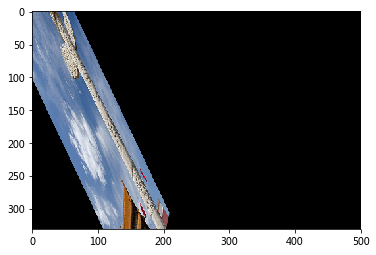

In [60]:

src = np.float32([[50, 50], [200, 50], [50, 200]])
dst = np.float32([[10, 100], [20, 50], [100, 290]])

new_img = Affine(img_rgb, src, dst)

from matplotlib import pyplot as plt 
plt.imshow(new_img)
plt.show()


# 投影变换

**旋转 + 平移 + 缩放 + 切变 + 射影 = 投影变换 (perspective transform)** 

$$
I_1 = PI_0 = \begin{bmatrix} a & b & c \\ d & e  & f \\ g & h & 1\end{bmatrix} \begin{bmatrix} x_0 \\ y_0  \\ 1 \end{bmatrix} \tag{8}
$$

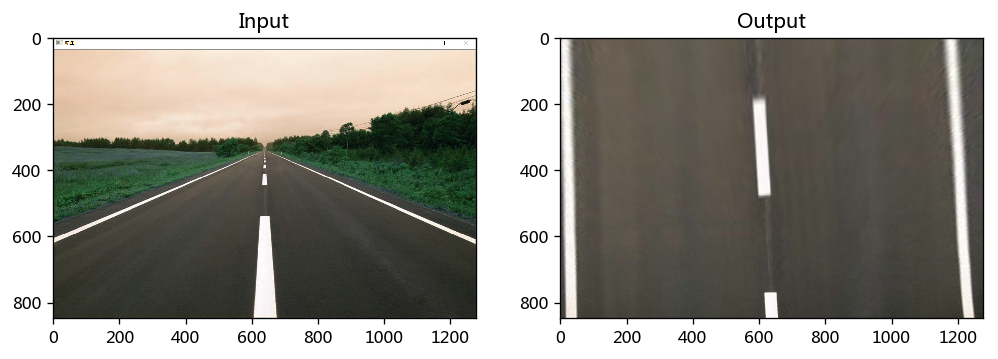

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#读取图片
img = cv2.imread('Lane_line.jpg',1)
#读取图片大小信息
rows,cols = img.shape[:2] # 848 * 1277

#选取原图中需要被转换物体的四个顶点
#pts1 = np.float32([[100,550],[1200,550],[500,400],[750,400]])
pts1 = np.float32([[0,600],[1277,600],[500,400],[800,400]])

#设置在新图像中原图像的四个顶点的位置
pts2 = np.float32([[0,rows],[cols,rows],[0,0],[cols,0]])

#计算转换M矩阵
M = cv2.getPerspectiveTransform(pts1,pts2)

#应用M矩阵到原图像
dst = cv2.warpPerspective(img,M,(cols,rows))


plt.figure(figsize=(10,10),dpi=120)#,dpi = 120
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


# 图像灰度变换

$$Gray = R*0.299 + G*0.587 + B*0.114 $$

## 线性变换

$r$ 为变换前的灰度，$s$为变换后的灰度，则线性变换的函数：

$$ s = a \times r + b $$

- $a > 1$ 增加图像的对比度

- $a < 1$ 减小图像的对比度

- $a = 1 且 b \neq 0$ 图像整体的灰度值上移或者下移，也就是图像整体变亮或者变暗，不会改变图像的对比度。

- $a < 0 且 b = 0$ 图像的亮区域变暗，暗区域变亮

- $a = -1 且 b = 255$ 图像反转

In [62]:
import cv2 
import numpy as np

# 线性变换
def linear(img,a,b):
    """
    s =f(r)=ar+b
    """
    r = np.copy(img)
    s = a*r+b
    return s


random a: 4, random b: 127


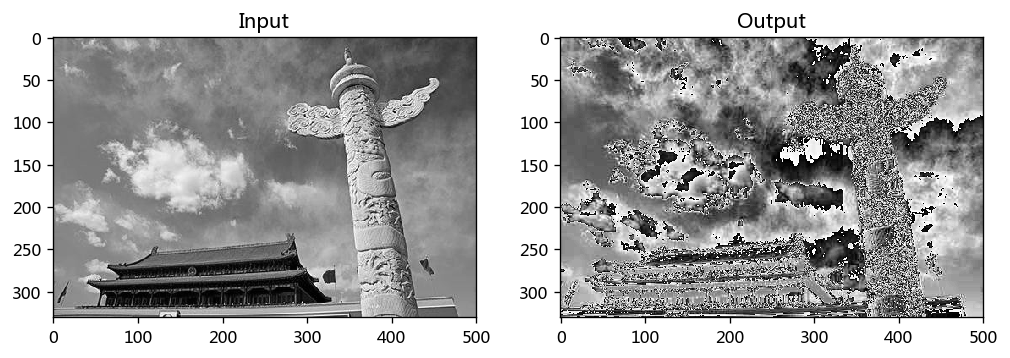

In [65]:
img = cv2.imread("Palace.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 调节 a,b值观察图像变化
random_a = random.randint(1,10)
random_b = random.randint(0,255)
re_img = linear(img,random_a,random_b)
print("random a: {}, random b: {}".format(random_a, random_b))
plt.figure(figsize= (10,10),dpi=120)
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Input')
plt.subplot(122),plt.imshow(re_img, cmap='gray'),plt.title('Output')


plt.show()


## 图像γ值转换

伽马变换的公式为：

$$ s = cr^\gamma $$

$\gamma<1$ 时，低亮度区域对比度增强    
$\gamma>1$ 时， 高亮度区域对比度增强

In [66]:
# 非线性变化：γ变换
def gamma(img,gamma):
    """
    s = c * r^gamma
    """
    r = np.copy(img)
    s = np.power(r/255, gamma)

    return s

random_gamma: 0.08393890700162521 


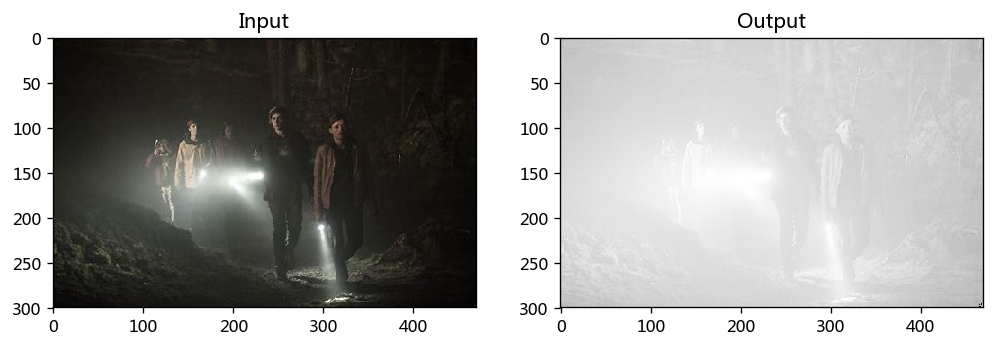

In [67]:
dark_img = cv2.imread("./dark.jpeg")
gray_img = cv2.cvtColor(dark_img, cv2.COLOR_BGR2GRAY)
# 调节 γ 值观察图像变化
random_gamma_value = random.random()
print('random_gamma: {} '.format(random_gamma_value))
re_img = gamma(gray_img, random_gamma_value)


plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(cv2.cvtColor(dark_img, cv2.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(re_img, cmap='gray'),plt.title('Output')
plt.show()

# 卷积

- <font color=green size=4 face=雅黑>  parameters sharing </font>  

## 一维卷积


<img src="https://img-blog.csdnimg.cn/20200326111118318.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="300" height="200" align="bottom" />

<img src="https://img-blog.csdnimg.cn/20200326111317780.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="300" height="400" align="bottom" />

## 二维卷积

<img src="https://img-blog.csdnimg.cn/20200303120025220.jpeg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70" alt="图片替换文本" width="400" height="600" align="bottom" />

## 图像卷积

 <center>
<img style="zoom:70%;"
src="图像卷积.jpg">
<br>
<div style="color:black; ">  </div>
</center>


# 卷积核有什么作用呢？

 ## 一阶求导 
 
<img src="https://img-blog.csdnimg.cn/20200326141354593.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="700" height="600" align="bottom" />

调用OpenCV的 filter2D() 函数实现边缘提取。该函数主要是利用内核实现对图像的卷积运算。filter2D() 函数用法如下所示：

```python
dst = filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
```

其中，参数：

src 表示输入图像；

dst 表示输出的边缘图，其大小和通道数与输入图像相同；

ddepth 表示目标图像所需的深度；

kernel 表示卷积核，一个单通道浮点型矩阵；

anchor 表示内核的基准点，其默认值为 (-1，-1)，位于中心位置；

delta 表示在储存目标图像前可选的添加到像素的值，默认值为0；

borderType 表示边框模式。

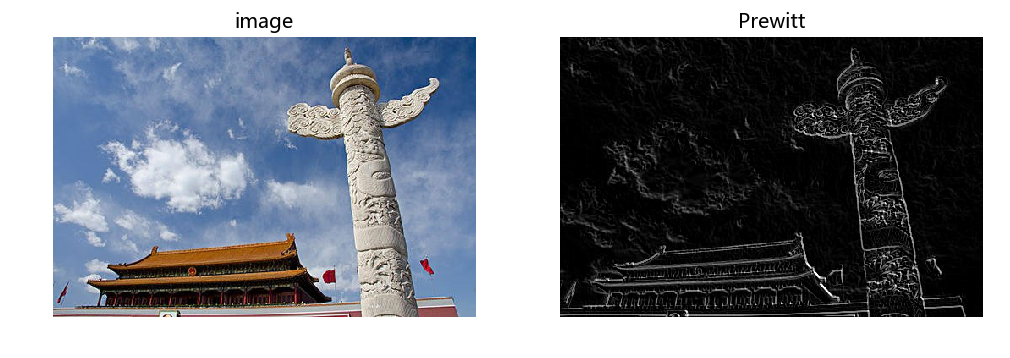

In [68]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# 读取图像
img = cv2.imread('Palace.jpg')

# imread 读的彩色图按照BGR像素存储、转换为RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Prewitt算子
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
kernelx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=int)

x = cv2.filter2D(grayImage, -1, kernelx)
y = cv2.filter2D(grayImage, -1, kernely) # cv2.CV_16S, 16bites, S（signed integer）是有符号整数

# 转uint8 
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

alpha = 0.5 
beta = 0.5
gamma_value = 0

Prewitt = cv2.addWeighted(absX, alpha, absY, beta, gamma_value)

# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(img_RGB),plt.title('image'), plt.axis('off') #坐标轴关闭
plt.subplot(122),plt.imshow(Prewitt, cmap=plt.cm.gray ),plt.title('Prewitt'), plt.axis('off')
plt.show()

```dst = cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])```


前四个是必须的参数：

- src 输入图像；
- ddepth 图像的深度，-1表示采用的是与原图像相同的深度。目标图像的深度必须大于等于原图像的深度；
- dx和dy表示的是求导的阶数，0表示这个方向上没有求导，一般为0、1、2。

其后是可选的参数：

- dst 输出图像；
- ksize是Sobel算子的大小，必须为1、3、5、7。
- scale是缩放导数的比例常数，默认情况下没有伸缩系数；
- delta是一个可选的增量，将会加到最终的dst中，同样，默认情况下没有额外的值加到dst中；
- borderType是判断图像边界的模式。这个参数默认值为cv2.BORDER_DEFAULT。


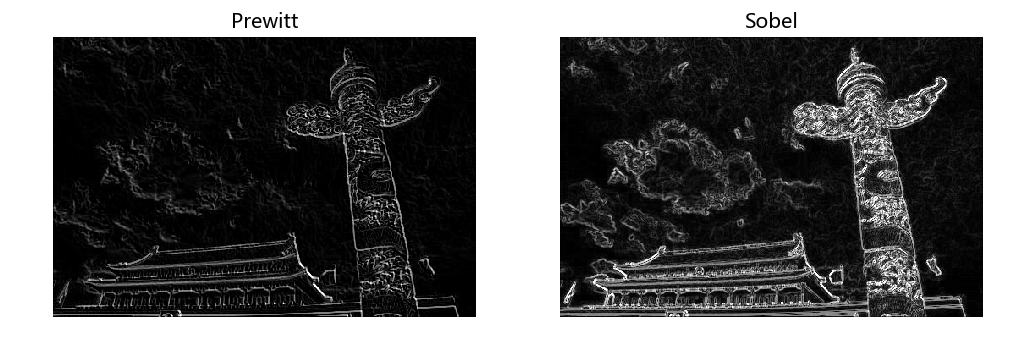

In [69]:
# Sobel算子
x = cv2.Sobel(grayImage, cv2.CV_16S, 1, 0)  # 对x求一阶导
y = cv2.Sobel(grayImage, cv2.CV_16S, 0, 1)  # 对y求一阶导
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

Sobel = cv2.addWeighted(absX, alpha, absY, beta, gamma_value)
 
# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(Prewitt, cmap=plt.cm.gray ),plt.title('Prewitt'), plt.axis('off')
plt.subplot(122),plt.imshow(Sobel, cmap=plt.cm.gray ),plt.title('Sobel'), plt.axis('off')
plt.show()

 ## 二阶求导 
 <img src="https://img-blog.csdnimg.cn/20200326163117463.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="700" height="600" align="bottom" />

(f(x+2)-f(x+1)) - (f(x+1)-f(x)) = f(x+2) - 2f(x+1) +f(x)


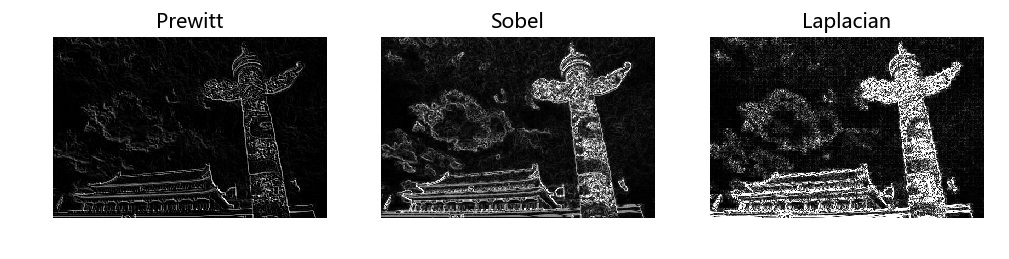

In [70]:
# 拉普拉斯算法
ksize = 3
dst = cv2.Laplacian(grayImage, cv2.CV_16S, ksize=ksize)
Laplacian = cv2.convertScaleAbs(dst)
 
# 显示结果
plt.figure(figsize=(10,10),dpi=120)

plt.subplot(131),plt.imshow(Prewitt, cmap=plt.cm.gray ),plt.title('Prewitt'), plt.axis('off')
plt.subplot(132),plt.imshow(Sobel, cmap=plt.cm.gray ),plt.title('Sobel'), plt.axis('off')
plt.subplot(133),plt.imshow(Laplacian, cmap=plt.cm.gray ),plt.title('Laplacian'), plt.axis('off')
plt.show()

## 卷积的应用
  - <font color=green size=3 face=雅黑>Image Sharpening: Laplacian</font> 
  - <font color=green size=3 face=雅黑>Edge Detection: Sobel</font> 
  - <font color=green size=3 face=雅黑>Image Blurring: Median/Gaussian</font> 
  - Reading: [Bilateral Filtering](https://blog.csdn.net/piaoxuezhong/article/details/78302920)
  

<font color=green size=3 face=雅黑>**Gaussian Kernel**</font> 

* 高斯滤波是一种线性平滑滤波，适用于消除高斯噪声，高斯滤波就是对整幅图像进行加权平均的过程，每一个像素点的值，都由其本身和邻域内的其他像素值经过加权平均后得到。
 

**高斯矩阵的尺寸越大，标准差越大，处理过的图像模糊程度越大。**



 <center>
<img style="zoom:70%;"
src="高斯滤波.jpeg">
<br>
<div style="color:black; ">  </div>
</center>




 <center>
<img style="zoom:90%;"
src="高斯图.webp">
<br>
<div style="color:black; ">  </div>
</center>


```python
dst = cv.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
```

* src: 图像矩阵
* ksize: 滤波窗口尺寸
* sigmax: 标准差

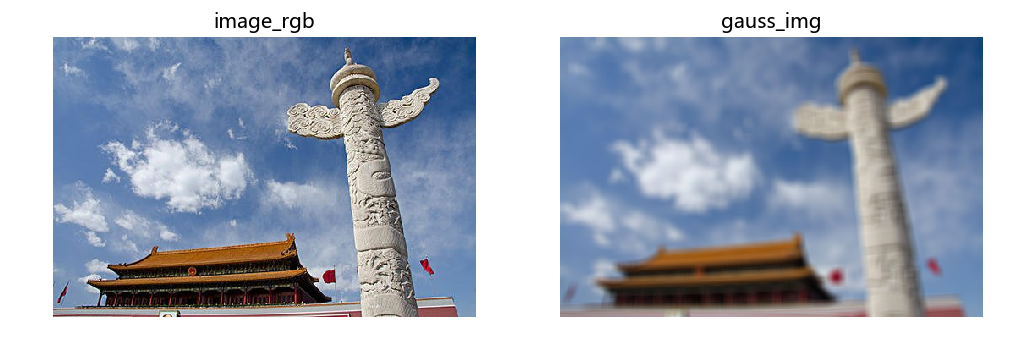

In [71]:
# img(bgr) to Img(rgb) 
gauss_ksize = (11,11)
gauss_sigmax = 20
gauss_img = cv2.GaussianBlur(img_rgb, gauss_ksize, gauss_sigmax)


# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(img_rgb),plt.title('image_rgb'), plt.axis('off') #坐标轴关闭
plt.subplot(122),plt.imshow(gauss_img),plt.title('gauss_img'), plt.axis('off')
plt.show()

<font color=green size=3 face=雅黑>**查看高斯核**</font> 

In [72]:
gauss_ksize = 11
gauss_sigmax = 20
cv2.getGaussianKernel(gauss_ksize, gauss_sigmax)

array([[0.089215  ],
       [0.09022434],
       [0.09101726],
       [0.0915879 ],
       [0.091932  ],
       [0.09204699],
       [0.091932  ],
       [0.0915879 ],
       [0.09101726],
       [0.09022434],
       [0.089215  ]])

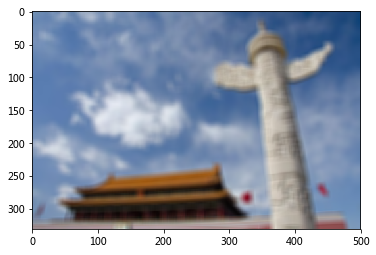

In [73]:
kernel_1d = cv2.getGaussianKernel(gauss_ksize, gauss_sigmax)
gl_img = cv2.sepFilter2D(img_rgb,-1,kernel_1d,kernel_1d)
plt.imshow(gl_img)

In [ ]:
gauss_img

In [ ]:
gl_img

In [ ]:
cv2.sepFilter2D?

<font color=green size=3 face=雅黑>** laplacian**</font> 

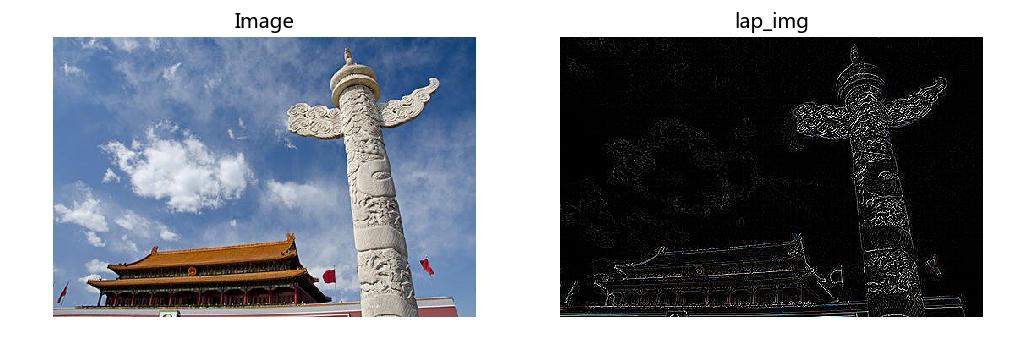

In [75]:
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])

lap_img = cv2.filter2D(img_rgb,-1,kernel)

# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(img_rgb),plt.title('Image'), plt.axis('off') #坐标轴关闭
plt.subplot(122),plt.imshow(lap_img,cmap=plt.cm.gray ),plt.title('lap_img'), plt.axis('off')
plt.show()

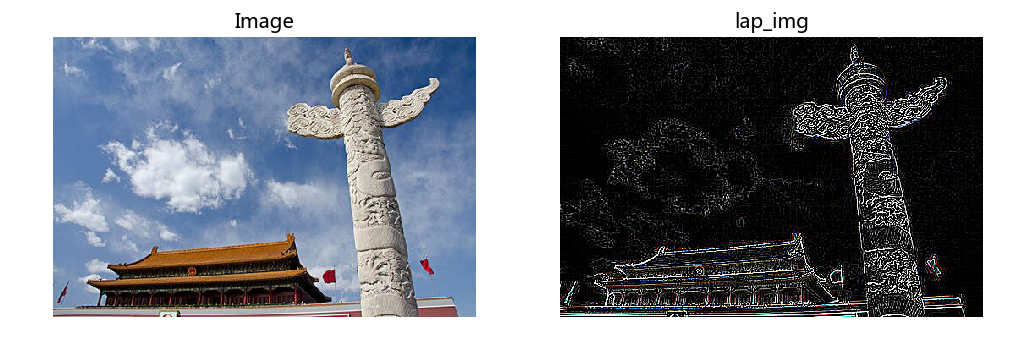

In [76]:
# 加强版
kernel_strong = np.array([[1,1,1],[1,-8,1],[1,1,1]])
lap_img = cv2.filter2D(img_rgb,-1,kernel_strong)

# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(img_rgb),plt.title('Image'), plt.axis('off') #坐标轴关闭
plt.subplot(122),plt.imshow(lap_img,cmap=plt.cm.gray ),plt.title('lap_img'), plt.axis('off')
plt.show()

<font color=green size=3 face=雅黑>**sobel**</font> 

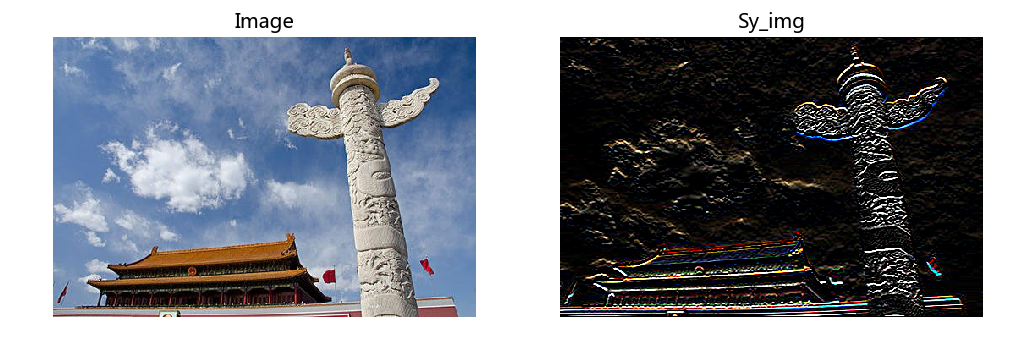

In [77]:
y_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sy_img = cv2.filter2D(img_rgb,-1,y_kernel)

# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(img_rgb, ),plt.title('Image'), plt.axis('off') #坐标轴关闭
plt.subplot(122),plt.imshow(sy_img,cmap=plt.cm.gray ),plt.title('Sy_img'), plt.axis('off')
plt.show()

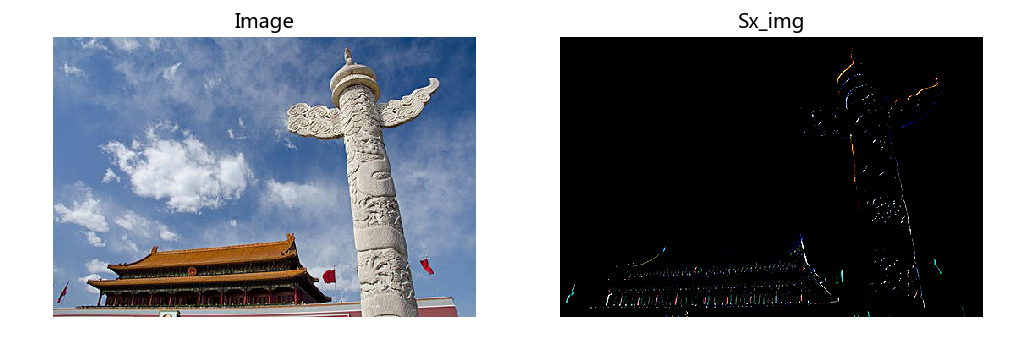

In [78]:
x_kernel = np.array([[-1,0,-1],[-2,0,2],[-1,0,1]])
sx_img = cv2.filter2D(img_rgb,-1,x_kernel)

# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(img_rgb, ),plt.title('Image'), plt.axis('off') #坐标轴关闭
plt.subplot(122),plt.imshow(sx_img,cmap=plt.cm.gray ),plt.title('Sx_img'), plt.axis('off')
plt.show()

<Figure size 1200x1200 with 0 Axes>

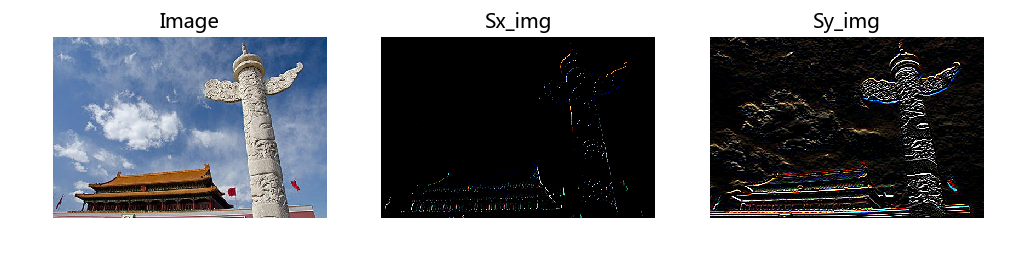

In [79]:
plt.figure(figsize=(10,10),dpi=120)

# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(131),plt.imshow(img_rgb ),plt.title('Image'), plt.axis('off') #坐标轴关闭
plt.subplot(132),plt.imshow(sx_img,cmap=plt.cm.gray ),plt.title('Sx_img'), plt.axis('off')
plt.subplot(133),plt.imshow(sy_img,cmap=plt.cm.gray ),plt.title('Sy_img'), plt.axis('off')
plt.show()

 $$ \begin{bmatrix} -k & -k & -k \\ -k & 8k+1  & -k \\ -k & -k & -k\end{bmatrix} $$

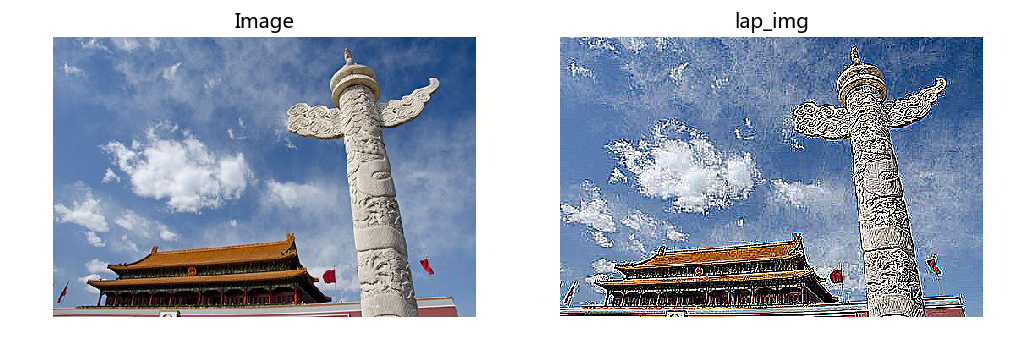

In [80]:
# 图像锐化
kernel_strong = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
lap_img = cv2.filter2D(img_rgb,-1,kernel_strong)

# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(121),plt.imshow(img_rgb, ),plt.title('Image'), plt.axis('off') #坐标轴关闭
plt.subplot(122),plt.imshow(lap_img),plt.title('lap_img'), plt.axis('off')
plt.show()

<font color=green size=3 face=雅黑>**medianblur**</font> 


 <center>
<img style="zoom:40%;"
src="中值滤波.jpeg">
<br>
<div style="color:black; ">  </div>
</center>

In [ ]:
 cv2.medianBlur?

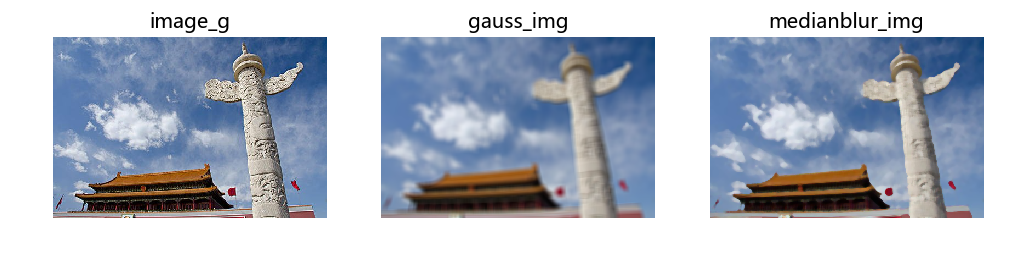

In [81]:
median_kesize = 7
md_img = cv2.medianBlur(img_rgb,7)

# 显示结果
plt.figure(figsize=(10,10),dpi=120)
plt.subplot(131),plt.imshow(img_rgb),plt.title('image_g'), plt.axis('off') #坐标轴关闭
plt.subplot(132),plt.imshow(gauss_img),plt.title('gauss_img'), plt.axis('off')
plt.subplot(133),plt.imshow(md_img),plt.title('medianblur_img'), plt.axis('off')
plt.show()

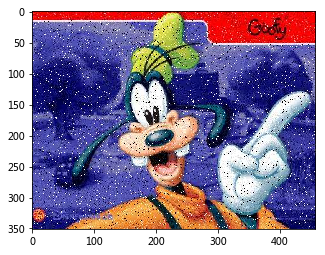

In [82]:
noise_img = cv2.imread('椒盐噪声图片.jpeg')

noise_img_rgb = cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB)
plt.imshow(noise_img_rgb)

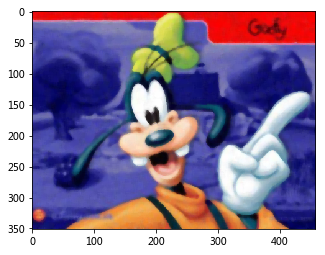

In [83]:
denoise_img = cv2.medianBlur(noise_img_rgb, median_kesize)
plt.imshow(denoise_img)

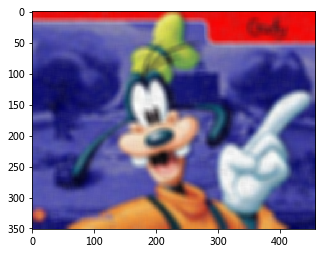

In [84]:
gauss_ksize = (11,11)
gauss_sigmax = 20
denoise_img = cv2.GaussianBlur(noise_img_rgb,gauss_ksize,gauss_sigmax)
plt.imshow(denoise_img)


 <center>
<img style="zoom:70%;"
src="高斯噪声图与椒盐噪声的图.jpg">
<br>
<div style="color:black; ">  </div>
</center>